# OWL-trainer 
### Mystery Heroes Exploratory Data Analysis 
version 0.1.0

In [233]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [234]:
# load the data
data = pd.read_csv('mystery.csv')
data

,Elimination,Assist,Death,Damage,Heal,Mitigation
0,10,5,1,5131,1943,6569
1,9,3,3,3197,5455,254
2,8,1,1,5103,61,79
3,9,1,4,2596,716,416
4,11,5,2,7316,1922,890
...,...,...,...,...,...,...
141,17,6,7,6310,2925,1354
142,24,3,3,7498,0,1973
143,20,6,4,5335,729,1501
144,14,1,9,5602,200,716


In [235]:
data.describe()

,Elimination,Assist,Death,Damage,Heal,Mitigation
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,12.952055,4.493151,5.458904,4401.842466,1815.404110,1747.013699
std,7.099618,4.251161,3.242236,1919.181286,1721.125031,1765.558929
min,0.000000,0.000000,0.000000,145.000000,0.000000,0.000000
25%,7.250000,1.250000,3.000000,2882.000000,379.750000,464.750000
50%,13.000000,3.000000,5.000000,4106.500000,1372.000000,1150.000000
75%,17.750000,6.000000,8.000000,5332.000000,3010.000000,2503.750000
max,34.000000,27.000000,13.000000,9477.000000,7655.000000,10246.000000


### Create Regression Model

In [236]:
y = data['Elimination']
x1 = data['Death']

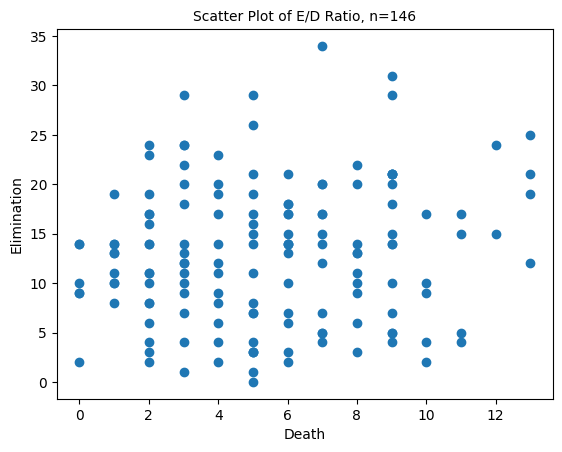

In [237]:
# plot x,y variables
plt.scatter(x1,y)
plt.title('Scatter Plot of E/D Ratio, n=146', fontsize=10)
plt.xlabel('Death',fontsize=10)
plt.ylabel('Elimination',fontsize=10)
plt.show()

In [238]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Elimination   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.421
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.122
Time:                        13:46:31   Log-Likelihood:                -491.61
No. Observations:                 146   AIC:                             987.2
Df Residuals:                     144   BIC:                             993.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4149      1.148      9.944      0.000       9.146      13.684
Death          0.2816      0.181      1.556      0.122      -0.076       0.639
==============================================================================
Omnibus:                        2.767   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.805
Skew:                           0.307   Prob(JB):                        0.246
Kurtosis:                       2.711   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scatter Plot: Elimination/Death Ratio (E/D)

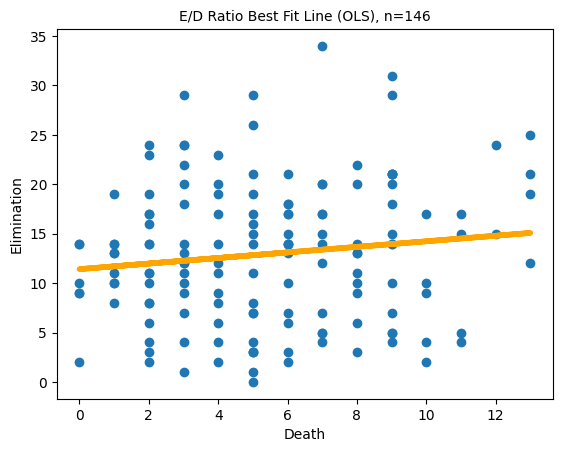

In [239]:
plt.scatter(x1,y)
coef_1 = 0.2816
coef_2 = 11.4149
yhat = coef_1 * x1 + coef_2
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression_line')
plt.title('E/D Ratio Best Fit Line (OLS), n=146', fontsize=10)
plt.xlabel('Death', fontsize=10)
plt.ylabel('Elimination', fontsize=10)
plt.show()

### Box Plot: Elimination

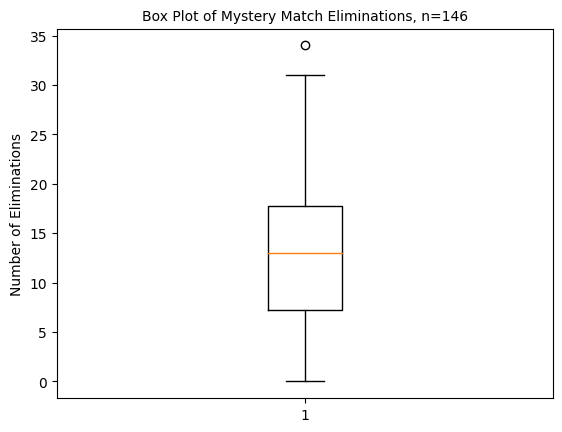

In [240]:
bp1 = data['Elimination']
plt.boxplot(bp1)
plt.title('Box Plot of Mystery Match Eliminations, n=146', fontsize=10)
plt.ylabel('Number of Eliminations', fontsize=10)
plt.show()

### Histogram: Elimination

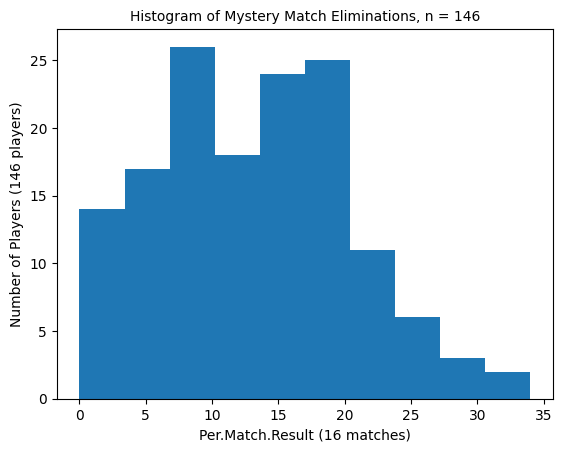

In [241]:
h1 = data['Elimination']
plt.hist(h1)
plt.title('Histogram of Mystery Match Eliminations, n = 146', fontsize=10)
plt.ylabel('Number of Players (146 players)', fontsize=10)
plt.xlabel('Elimination.Per.Match.Result (16 matches total)', fontsize=10)
plt.show()